In [67]:
function game_sizes(num_players, num_strategies)
    num_roles = length(num_players)
    full_sizes = zeros(BigInt, num_roles)
    dev_sizes = zeros(BigInt, num_roles)
    for r in 1:num_roles
        p = num_players[r]
        s = num_strategies[r]
        full_sizes[r] = binomial(p+s-1, p)
        dev_sizes[r] = binomial(p+s-2, p-1)
    end
    S = sum(num_strategies)
    monolithic_size = 3 * prod(full_sizes) * S
    separated_size = 0
    for r in 1:num_roles
        separated_size += prod(full_sizes[1:r-1]) * prod(full_sizes[r+1:end]) * dev_sizes[r] * (num_strategies[r] + S + 1)
    end
    return monolithic_size, separated_size
end

game_sizes (generic function with 1 method)

In [68]:
monolithic_sizes = zeros(BigInt,4,20,20)
separated_sizes = zeros(BigInt,4,20,20)
separated_better = zeros(Float64,4,20,20)
monolithic_better = zeros(Float64,4,20,20)
for r in 1:4
   for p in 1:20
       for s in 1:20
           (mon,sep) = game_sizes([p for i in 1:r], [s for i in 1:r])
           monolithic_sizes[r,p,s] = mon
           separated_sizes[r,p,s] = sep
        separated_better[r,s,p] = mon / sep
        monolithic_better[r,s,p] = sep / mon
       end
   end
end
separated_better[1,1,:] .= NaN;
separated_better[:,:,1] .= NaN;
separated_better[separated_better .<= 1] .= NaN;
monolithic_better[:,:,1] .= NaN;
monolithic_better[1,1,:] .= NaN;
monolithic_better[monolithic_better .<= 1] .= NaN;

In [10]:
using Plots

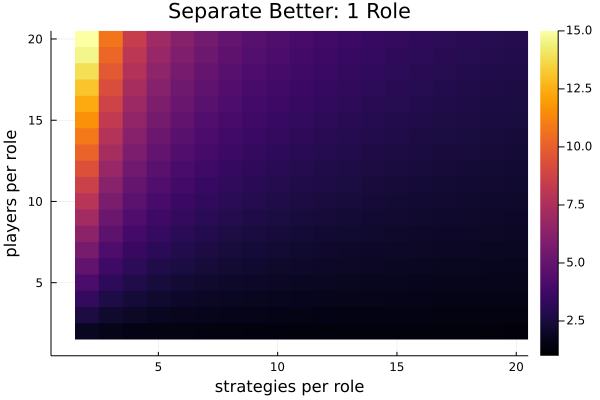

In [89]:
heatmap(separated_better[1,:,:], xlabel="strategies per role", ylabel="players per role", title="Separate Better: 1 Role", clims=(1, 15))

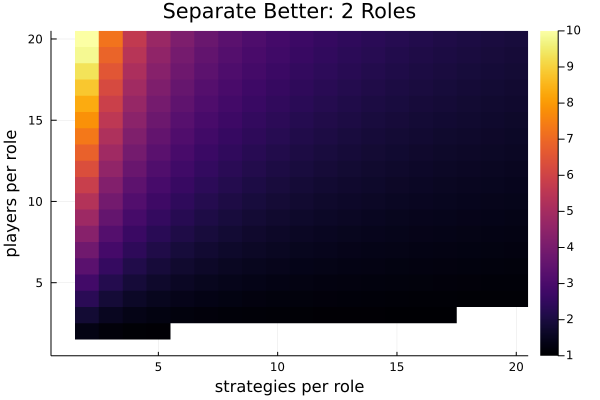

In [86]:
heatmap(separated_better[2,:,:], xlabel="strategies per role", ylabel="players per role", title="Separate Better: 2 Roles", clims=(1, 10))

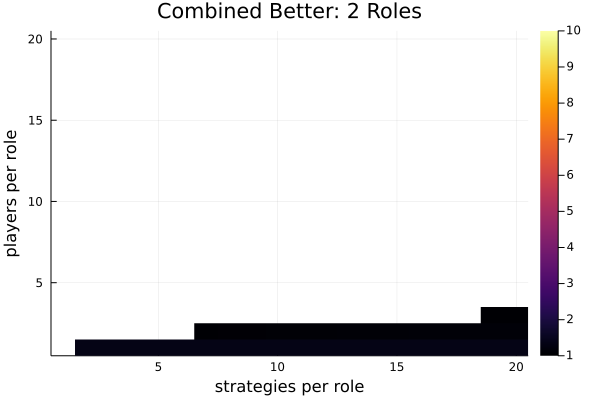

In [87]:
heatmap(monolithic_better[2,:,:], xlabel="strategies per role", ylabel="players per role", title="Combined Better: 2 Roles", clims=(1, 10))

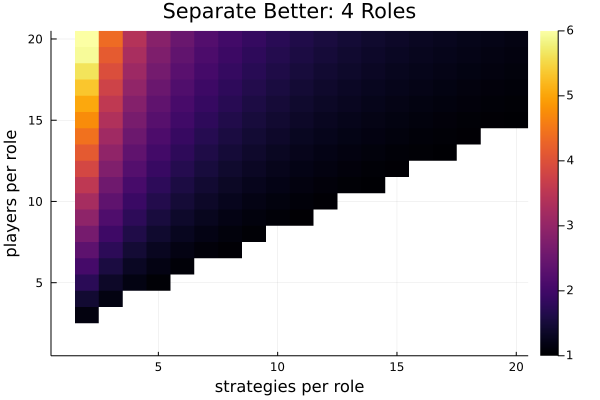

In [84]:
heatmap(separated_better[4,:,:], xlabel="strategies per role", ylabel="players per role", title="Separate Better: 4 Roles", clims=(1, 6))

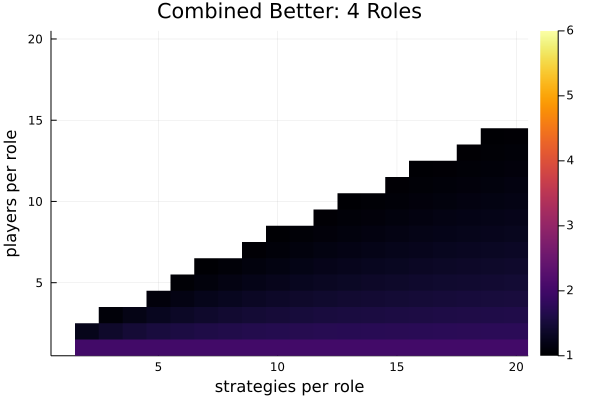

In [85]:
heatmap(monolithic_better[4,:,:], xlabel="strategies per role", ylabel="players per role", title="Combined Better: 4 Roles", clims=(1, 6))